In [66]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


import statsmodels.api as sm

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

file = pd.read_excel ('./Data/subset1.xlsx')


df = pd.DataFrame(file, columns=file.columns)


In [7]:
df.drop(df[pd.isnull(df['EU_Imgration'])].index, inplace=True)

In [67]:
df.drop('year', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('Population_growth_all', axis=1, inplace=True)
df.drop('Pop_Growth_rate', axis=1, inplace=True)
df.drop('Population_change', axis=1, inplace=True)
df.drop('Mortality_rate', axis=1, inplace=True)
df.drop('Fertility_Rates_%', axis=1, inplace=True)
df.drop('Births_Deaths', axis=1, inplace=True)


In [68]:
corr = df.corr()
corr.iloc[:,19:20]


,Population_growth
population,0.928299
No_Briths_E&W,0.576039
No_Births_NI,-0.525631
No_Births_S,-0.718065
No_Births_All,0.444334
No_births_male,0.436310
No_births_female,0.452286
No_deaths_EW,-0.929386
No_deaths_NI,-0.838130
No_deaths_S,-0.909024


In [69]:
X = df.drop('Population_growth',1 )
Y = df['Population_growth']


In [70]:
sfs = SFS(LinearRegression(),
         k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X,Y)
sfs.k_feature_names_

('population',
 'No_Briths_E&W',
 'No_Births_NI',
 'No_Births_S',
 'No_births_male',
 'No_deaths_NI',
 'No_deaths_S',
 'No_deaths_female',
 'Emigration',
 'Migration_rate',
 'EU_Imgration')

In [62]:

x = pd.DataFrame(file, columns=[
 'population',
 'No_Briths_E&W',
 'No_Births_NI',
 'No_Births_S',
 'No_births_male',
 'No_deaths_NI',
 'No_deaths_S',
 'No_deaths_female',
 'Emigration',
 'Migration_rate',
 'EU_Imgration',])
"""
x = pd.DataFrame(file, columns=[
    'population', 
    'No_Briths_E_W', 
    'No_Births_All', 
    'No_births_male', 
    'No_births_female',
    'Births_Deaths',  
    'Migration', 
    'EU_Imgration', 
    'EU_Emigration'])
"""
y = pd.DataFrame(file, columns=['Population_growth'])


In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, shuffle=True)


In [71]:
scaler = preprocessing.StandardScaler()

sx_train = scaler.fit_transform(x_train)
sx_test = scaler.fit_transform(x_test)

In [72]:
lr = LinearRegression()
lr.fit(sx_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred = lr.predict(sx_test)

In [74]:
#root mean square error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

93287.03741151966

0.4870158745361315

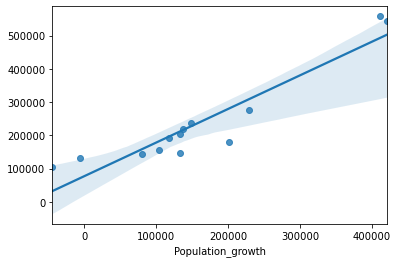

In [75]:
#compare predicted numbers with actual numbes 
check = np.column_stack((y_test, y_pred))
pd.DataFrame(check, columns=['actual', 'predicted'])
sns.regplot(y_test, y_pred)
lr.score(sx_test, y_test)

In [24]:
lrN = GaussianNB().fit(sx_train, np.hstack(y_train.values))

In [25]:
y_pred_n = lrN.predict(sx_test)


In [21]:
#compare predicted numbers with actual numbes 
check = np.column_stack((y_test, y_pred_n))
pd.DataFrame(check, columns=['actual', 'predicted'])


,actual,predicted
0,192565,190088
1,37189,198
2,131070,133561
3,470544,506383
4,345585,374339
5,121483,142105
6,117125,103332
7,376205,374339
8,64995,-24273
9,137864,142105


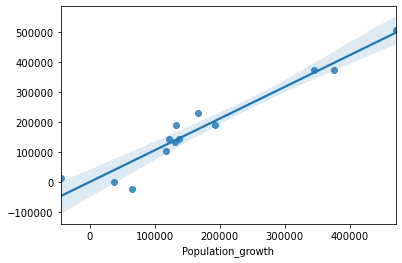

In [26]:
sns.regplot(y_test, y_pred_n)

In [27]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred_n))

41880.099572837324

In [48]:
#Standardizing the features
sX = scaler.fit_transform(X)
#dimension reduction 16D into 4D
pca = PCA(n_components=4).fit_transform(sX)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(pca, y, test_size=0.3, random_state=0)

In [50]:
#linear regression after dimension reduction using PCA
lrP = LinearRegression().fit(x_train, y_train)

yP_pred = lrP.predict(x_test)
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, yP_pred))

47725.220412818235

In [65]:
#seeking the best random_state parameter for train_test_split
lr3 = LinearRegression()
sqrt = 0
best_sqrt = 0
best_rand_state = 0

for n in range(100):
    x_train, x_test, y_train, y_test = train_test_split(pca, y, test_size=0.2, random_state=n)
    
   
    
    lr3.fit(x_train, y_train)
    
    y_pred = lr3.predict(x_test)
    
    
    
    sqrt = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    if n < 1:
        best_sqrt = sqrt

    if sqrt < best_sqrt:
        best_sqrt = sqrt
        best_rand_state = n
        
print("The best sqrt is: ", best_sqrt)
print("The best random_state is: ", best_rand_state)

The best sqrt is:  28408.562988860685
The best random_state is:  77
